In [1]:
import numpy as np
from scipy.integrate import odeint
from pyqtgraph.Qt import QtCore
import random

class kineticSolver():

    def __init__(self):
        self.T = 20 #[°C]
        self.kinetic = 0
        self.Ca_0 = 0.1 #[mol/l]
        self.Cb_0 = 0.1 #[mol/l]
        self.cp = 0 #[mol/l]
        self.ca = 0 #[mol/l]
        self.cb = 0 #[mol/l]
        self.reactorvolume = 100 #[ml]
        self.concentration = []

    def setT(self, Tgui):
        self.T = Tgui

    def getTreal(self):
        return self.Treal

    def setKinetic(self, kinetic):
        self.kinetic = kinetic

    def setCa_0(self, new):
        self.Ca_0 = new

    def setCb_0(self, new):
        self.Cb_0 = new
        
    def getConcentration(self):
        return self.concentration
 


    def calculate(self):
        iniConditions = iniConditions()
        kinetic = self.kinetic()
        self.concentration = calcConcentration(kinetic, iniConditions)
        # Messungenauigkeit später implementierenn
        

    def calcConcentration(self, kinetic, iniConditions):
        t = np.linspace(0, 12000, 1200)
        # 1200s = 20 min, 10 integrationsschritte pro Sekunde
        if kinetic == 0:
            y = odeint(self.scnd, iniConditions, t)
        if kinetic == 1:
            y = odeint(self.noreact, iniConditions, t)
        if kinetic == 2:
            y = odeint(self.pow, iniConditions, t)
        concentration = y[:, 2]
        return concentration
    
    def addMesuringInaccuracy(self, value):
        rnd = random.randrange(-20, 20, 1)/1000
        value = value * (1 + rnd)
        return value
    
    def iniConditions(self):
        ca0 = self.Ca_0
        cb0 = self.Cb_0
        cp0 = 0
        T = self.T
        iniConditions = [ca0, cb0, cp0, T]
        return iniConditions



# kinetics
    def scnd(self, z, t):
        # A + B -> P
        a = z[0]
        b = z[1]
        p = z[2]
        T = z[3]
        k = 40*np.exp(-20/T)
        dadt = -k*a*b
        dbdt = -k*a*b
        dpdt = k*a*b
        dTdt = 0
        return [dadt, dbdt, dpdt, dTdt]

    def noreact(self, z, t):
        return [0, 0, 0, 0]
    
    def pow(self, z, t):
        # 2A + B -> P
        a=z[0]
        b=z[1]
        p=z[2]
        T = z[3]
        k=40*np.exp(-23/T)
        dadt = -2*k*a*a*b
        dbdt =-k*a*a*b
        dpdt = k*a*a*b
        dTdt = 0
        return [dadt,dbdt,dpdt, dTdt]

/Users/claas/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def ErsteOrdnung(k,t,A0):
        cA =  A0 * (np.exp(-k*t))
        return cA
ErstOrdVec = np.vectorize(ErsteOrdnung)

In [8]:
ErstOrdVec(1, np.linspace(0,1,1000),2)

array([2.        , 1.997999  , 1.996     , 1.994003  , 1.992008  ,
       1.990015  , 1.98802399, 1.98603497, 1.98404794, 1.9820629 ,
       1.98007985, 1.97809878, 1.97611969, 1.97414258, 1.97216745,
       1.9701943 , 1.96822312, 1.96625391, 1.96428667, 1.9623214 ,
       1.9603581 , 1.95839676, 1.95643738, 1.95447997, 1.95252451,
       1.95057101, 1.94861946, 1.94666987, 1.94472223, 1.94277653,
       1.94083278, 1.93889098, 1.93695112, 1.9350132 , 1.93307722,
       1.93114317, 1.92921106, 1.92728089, 1.92535264, 1.92342633,
       1.92150194, 1.91957948, 1.91765894, 1.91574032, 1.91382362,
       1.91190884, 1.90999597, 1.90808502, 1.90617598, 1.90426885,
       1.90236363, 1.90046032, 1.89855891, 1.8966594 , 1.89476179,
       1.89286608, 1.89097227, 1.88908035, 1.88719033, 1.88530219,
       1.88341595, 1.88153159, 1.87964912, 1.87776853, 1.87588982,
       1.87401299, 1.87213804, 1.87026497, 1.86839376, 1.86652444,
       1.86465698, 1.86279139, 1.86092767, 1.85906581, 1.85720

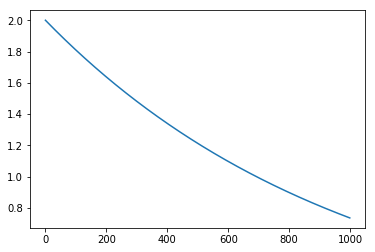

In [7]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()